<a href="https://colab.research.google.com/github/AngelTroncoso/MarketingDirigido/blob/main/Segmentaci%C3%B3n_de_Clientes_para_Marketing_Dirigido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd


In [22]:
df = pd.read_csv('/content/dataset_segmentacion_clientes.csv')

In [40]:
df.head()

,CustomerID,Fecha_compra,Monto,Canal,Categoria_favorita
0,C0001,2025-05-07,81.67,Tienda,Salud
1,C0001,2025-05-24,6.71,Web,Hogar
2,C0001,2025-03-24,28.35,App,Moda
3,C0001,2025-03-11,68.77,Web,Electrónica
4,C0002,2025-08-01,33.52,Web,Electrónica


#🎯 ¿Cuál es la variable principal en este caso?

🧠 ¿Por qué RFM es la base?  
- Recencia: Clientes recientes = más propensos a responder a marketing.

- Frecuencia: Clientes frecuentes = mayor lealtad.

- Monetario: Clientes de alto valor = prioridad en campañas personalizadas.

  Con estas tres, puedes calcular un “score” o clasificar clientes tipo:
VIP, leales, dormidos, recuperables, etc

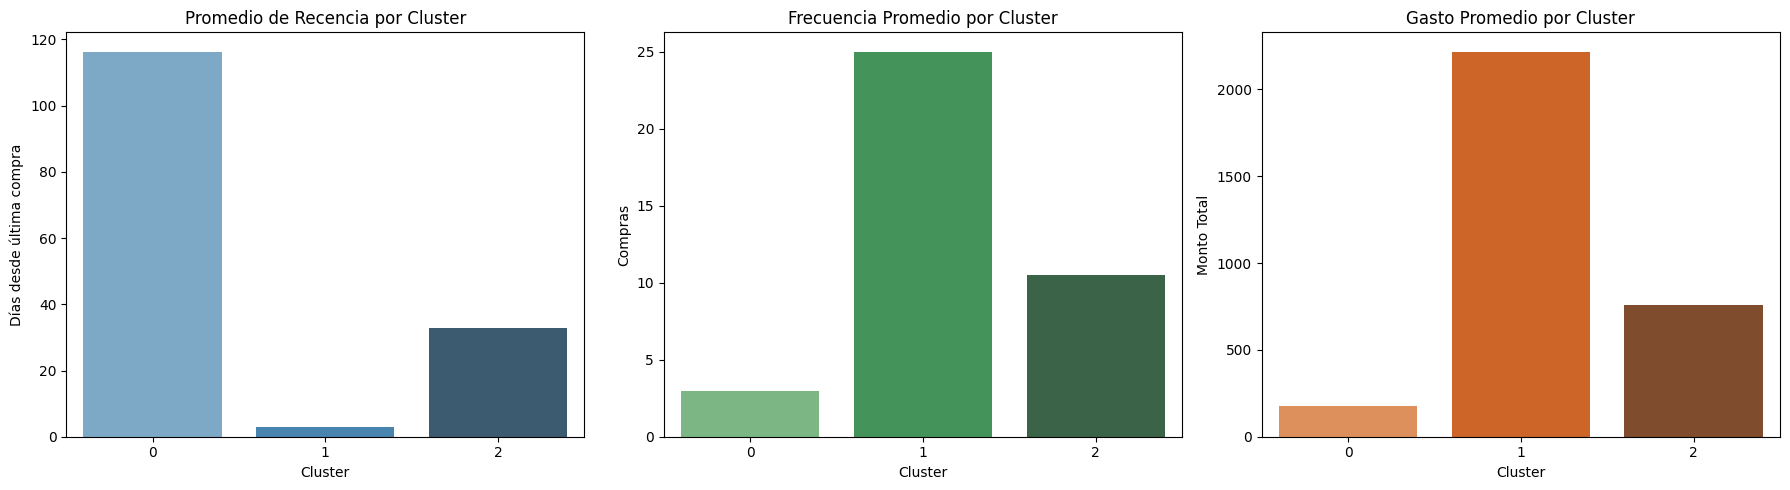

,Cluster,Recencia,Frecuencia,Monto_total,Cantidad_de_clientes
0,0,116.333333,3.0,177.066667,3
1,1,3.000000,25.0,2217.096667,3
2,2,32.750000,10.5,757.775000,4


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Escalar las métricas RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm[['Recencia', 'Frecuencia', 'Monto_total']])

# Aplicar K-Means con 3 clusters como ejemplo
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Preparar datos agregados por cluster
cluster_summary = df_rfm.groupby('Cluster').agg({
    'Recencia': 'mean',
    'Frecuencia': 'mean',
    'Monto_total': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Cantidad_de_clientes'}).reset_index()

# Gráficos interpretativos
plt.figure(figsize=(18, 5))

# Recencia
plt.subplot(1, 3, 1)
sns.barplot(x='Cluster', y='Recencia', data=cluster_summary, palette='Blues_d')
plt.title('Promedio de Recencia por Cluster')
plt.ylabel('Días desde última compra')

# Frecuencia
plt.subplot(1, 3, 2)
sns.barplot(x='Cluster', y='Frecuencia', data=cluster_summary, palette='Greens_d')
plt.title('Frecuencia Promedio por Cluster')
plt.ylabel('Compras')

# Monetario
plt.subplot(1, 3, 3)
sns.barplot(x='Cluster', y='Monto_total', data=cluster_summary, palette='Oranges_d')
plt.title('Gasto Promedio por Cluster')
plt.ylabel('Monto Total')

plt.tight_layout()
plt.show()

cluster_summary


#📊 Gráficos interpretativos:  
Recencia por clúster:

- El Clúster 0 tiene clientes muy recientes (≈ 3 días desde la última compra).

- El Clúster 1 está formado por clientes inactivos o dormidos (más de 100 días sin comprar).

- El Clúster 2 representa un punto medio.

Frecuencia por clúster:

- El Clúster 0 es el más frecuente: ≈ 25 compras.

- El Clúster 1 compra muy poco: ≈ 3 veces.

- El Clúster 2 es intermedio: ≈ 10 compras.

Monto total por clúster:

- El Clúster 0 es el de mayor valor monetario: ≈ $2200.
- El Clúster 1 gasta muy poco.
- El Clúster 2 gasta una cantidad media.

| Cluster | Descripción breve                                   | Acción recomendada                     |
| ------- | --------------------------------------------------- | -------------------------------------- |
| **0**   | **Clientes VIP**: recientes, frecuentes, alto gasto | Recompensar, fidelizar, exclusividades |
| **1**   | **Clientes dormidos**: inactivos, poco frecuentes   | Re-activar con campañas especiales     |
| **2**   | **Clientes regulares**: nivel medio en todo         | Mantener con promociones ocasionales   |


#**Otros Insigth de Valor:**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#🔧 1. Análisis de Cohortes  
¿Qué es? Agrupa a los clientes por el mes o trimestre de su primera compra.

¿Por qué sirve? Permite ver cómo se comportan los clientes a lo largo del tiempo y qué cohortes son más leales.

Ejemplo de insight: "Los clientes adquiridos en enero siguen activos después de 6 meses, pero los de abril abandonan a los 2 meses."

Fecha_compra        2025-01-31  2025-02-28  2025-03-31  2025-04-30  \
Mes_primera_compra                                                   
2025-01                   23.0        52.2        47.8        34.8   
2025-02                    0.0         0.0         0.0         0.0   
2025-03                    0.0         0.0         0.0         0.0   
2025-04                    0.0         0.0         0.0         0.0   
2025-05                    0.0         0.0         0.0         0.0   
2025-06                    0.0         0.0         0.0         0.0   
2025-07                    0.0         0.0         0.0         0.0   
2025-08                    0.0         0.0         0.0         0.0   
2025-09                    0.0         0.0         0.0         0.0   

Fecha_compra        2025-05-31  2025-06-30  2025-07-31  2025-08-31  2025-09-30  
Mes_primera_compra                                                              
2025-01                   47.8        17.4         0.0         0.0 

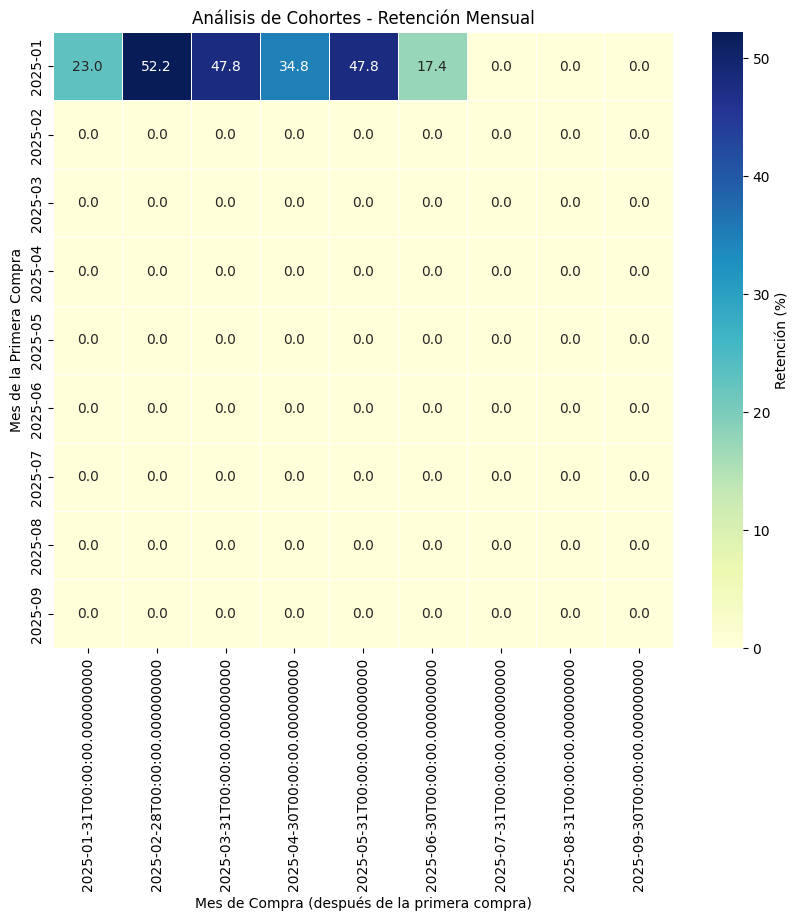

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analisis_cohortes(df):
    """
    Realiza un análisis de cohortes basado en el mes de la primera compra.

    Args:
        df (pd.DataFrame): DataFrame con las columnas 'CustomerID' y 'Fecha_compra'.

    Returns:
        pd.DataFrame: DataFrame con la tabla de cohortes, mostrando la retención mensual.
    """

    # 1. Preparación de los datos
    df['Fecha_compra'] = pd.to_datetime(df['Fecha_compra'])
    df['Mes_primera_compra'] = df.groupby('CustomerID')['Fecha_compra'].transform('min').dt.to_period('M')

    # 2. Crear la tabla de cohortes
    cohortes = df.groupby(['Mes_primera_compra', pd.Grouper(key='Fecha_compra', freq='M')])['CustomerID'].nunique()
    cohortes = cohortes.unstack(level=1)

    # 3. Calcular la retención
    cohort_size = cohortes.iloc[:,0]
    retention_matrix = cohortes.copy()
    for i in range(1, len(cohortes.columns)):
        retention_matrix.iloc[:, i] = (retention_matrix.iloc[:, i] / cohort_size) * 100

    # 4. Formatear la tabla (opcional, para mejor visualización)
    retention_matrix = retention_matrix.fillna(0)  # Reemplazar NaN con 0
    retention_matrix = retention_matrix.round(1) # Redondear a un decimal

    return retention_matrix



tabla_cohortes = analisis_cohortes(df)
print(tabla_cohortes)

# Crear el gráfico de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(tabla_cohortes, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Retención (%)'})
plt.title('Análisis de Cohortes - Retención Mensual')
plt.xlabel('Mes de Compra (después de la primera compra)')
plt.ylabel('Mes de la Primera Compra')
plt.show()

#🎯 2. Análisis de Canales y Preferencias  
Variables clave: Canal, Categoria_favorita

¿Por qué sirve? Identifica:

Qué canales prefieren los mejores clientes.

Qué productos o categorías generan más ingresos según el segmento.

Acción: Personalizar campañas por canal y categoría.


Canales preferidos por los mejores clientes (top 20% por gasto):
 Canal
App       72
Web       71
Tienda    57
Name: count, dtype: int64


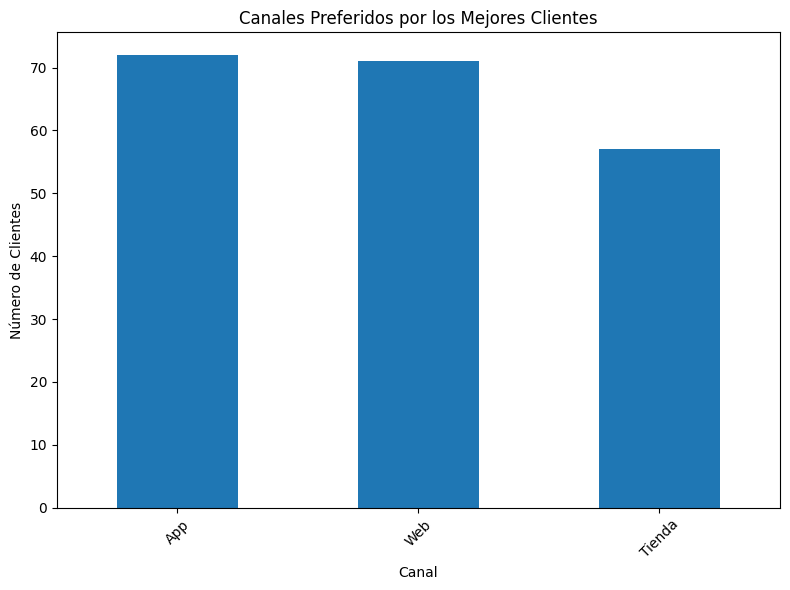


Ingresos totales por categoría:
 Categoria_favorita
Electrónica    15164.59
Salud          14399.89
Hogar          13448.21
Libros         13351.28
Moda           13251.53
Name: Monto, dtype: float64


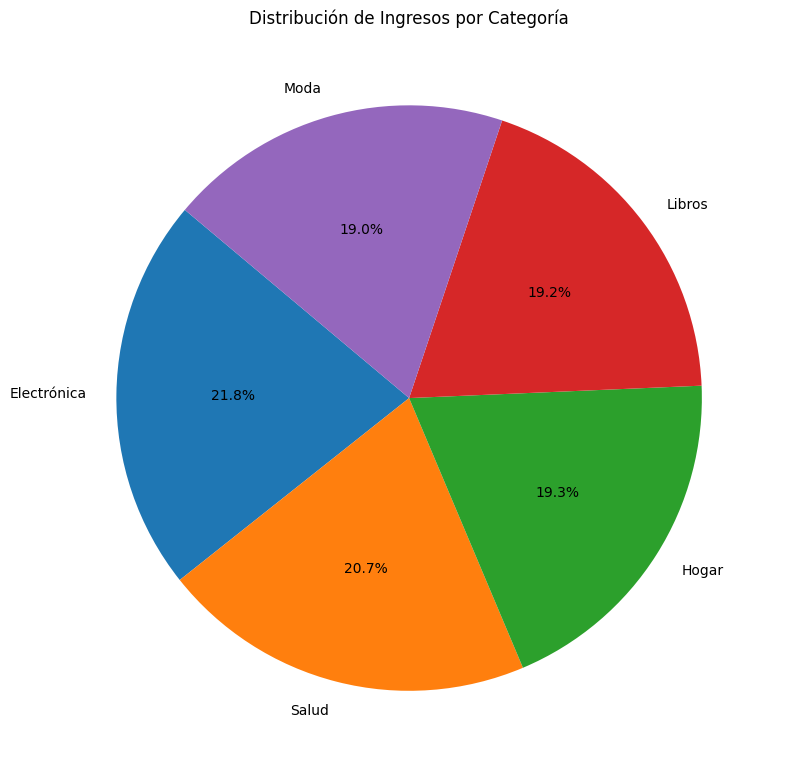


Ingresos por categoría y canal:
 Canal                   App   Tienda      Web
Categoria_favorita                           
Electrónica         5978.54  4954.67  4231.38
Hogar               5243.14  4336.58  3868.49
Libros              3121.76  4288.11  5941.41
Moda                4604.64  4415.14  4231.75
Salud               5319.55  4621.18  4459.16


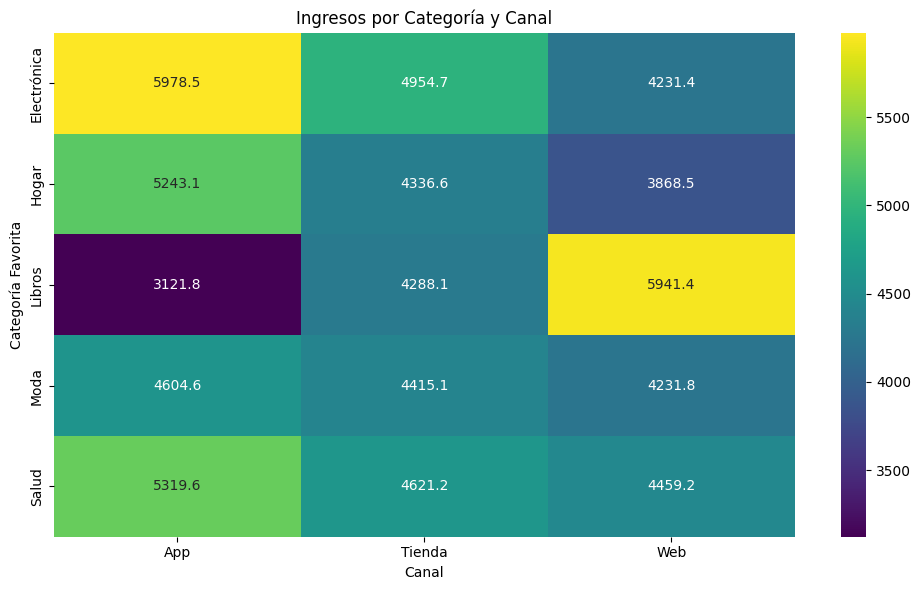

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analisis_canales_y_preferencias(df):
    # 1. Canales preferidos por los mejores clientes (top 20% de clientes por gasto)
    top_clientes = df.groupby('CustomerID')['Monto'].sum().nlargest(int(len(df['CustomerID'].unique()) * 0.2))
    top_clientes_df = pd.DataFrame({'CustomerID': top_clientes.index, 'Total_Gasto': top_clientes.values})
    df_top_clientes = pd.merge(top_clientes_df, df, on='CustomerID')
    canal_preferido_top = df_top_clientes['Canal'].value_counts().head(5)
    print("\nCanales preferidos por los mejores clientes (top 20% por gasto):\n", canal_preferido_top)

    # Gráfico de barras para canales preferidos por los mejores clientes
    plt.figure(figsize=(8, 6))
    canal_preferido_top.plot(kind='bar')
    plt.title('Canales Preferidos por los Mejores Clientes')
    plt.xlabel('Canal')
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Ingresos por categoría según el segmento (todos los clientes)
    ingresos_por_categoria = df.groupby('Categoria_favorita')['Monto'].sum().sort_values(ascending=False)
    print("\nIngresos totales por categoría:\n", ingresos_por_categoria)

    # Gráfico de pastel para ingresos por categoría
    plt.figure(figsize=(8, 8))
    plt.pie(ingresos_por_categoria, labels=ingresos_por_categoria.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de Ingresos por Categoría')
    plt.tight_layout()
    plt.show()

    # 3. Ingresos por categoría y canal (para personalización)
    ingresos_por_categoria_canal = df.groupby(['Categoria_favorita', 'Canal'])['Monto'].sum().unstack()
    print("\nIngresos por categoría y canal:\n", ingresos_por_categoria_canal)

    # Mapa de calor para ingresos por categoría y canal
    plt.figure(figsize=(10, 6))
    sns.heatmap(ingresos_por_categoria_canal, annot=True, fmt=".1f", cmap="viridis")
    plt.title('Ingresos por Categoría y Canal')
    plt.xlabel('Canal')
    plt.ylabel('Categoría Favorita')
    plt.tight_layout()
    plt.show()


analisis_canales_y_preferencias(df)

#📍 3. Análisis de Propensión de Compra  
Técnica: Modelos de machine learning (árboles de decisión, regresión logística).

¿Qué predice? La probabilidad de que un cliente compre en los próximos días/semanas.

Acción: Lanza campañas automatizadas solo a quienes tienen alta probabilidad.

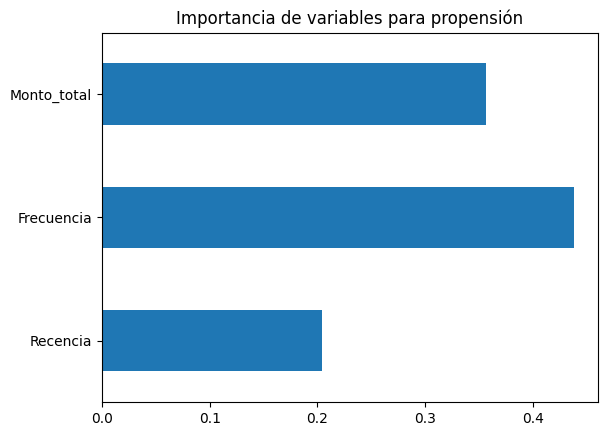

In [45]:
### 3. Análisis de Propensión de Compra (modelo simple) ###
df_model = df_rfm.copy()
df_model['Compra'] = np.where(df_model['Recencia'] < df_model['Recencia'].median(), 1, 0)
X = df_model[['Recencia', 'Frecuencia', 'Monto_total']]
y = df_model['Compra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.plot(kind='barh', title='Importancia de variables para propensión')
plt.show()

#⌛ 4. Valor del Tiempo de Vida del Cliente (CLV)
¿Por qué es clave? Permite invertir proporcionalmente en retención.

Método: Modelos como BG/NBD o Gamma-Gamma para estimar ingresos futuros.

Acción: Personalizar descuentos o membresías para clientes con alto CLV proyectado.

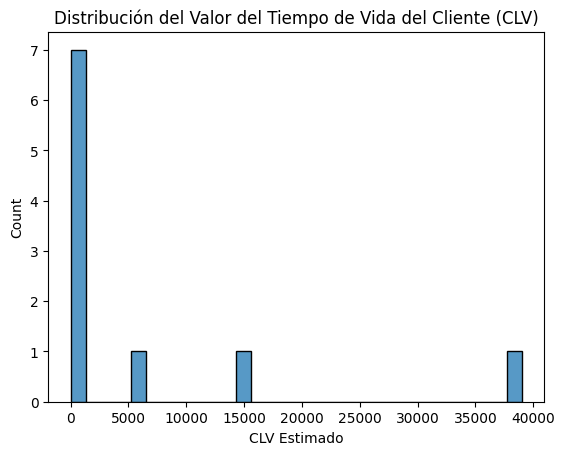

In [32]:
### 4. Valor del Tiempo de Vida del Cliente (CLV simplificado) ###
df_rfm['CLV'] = df_rfm['Frecuencia'] * df_rfm['Monto_total'] / (df_rfm['Recencia'] + 1)
sns.histplot(df_rfm['CLV'], bins=30)
plt.title("Distribución del Valor del Tiempo de Vida del Cliente (CLV)")
plt.xlabel("CLV Estimado")
plt.show()

#🔍 5. Análisis de Churn (Abandono)  
¿Qué detecta? Quiénes están a punto de irse o ya lo hicieron.

Técnicas: Random Forest, XGBoost, o simplemente reglas heurísticas sobre recencia.

Acción: Intervenir antes de que el cliente se “pierda”.

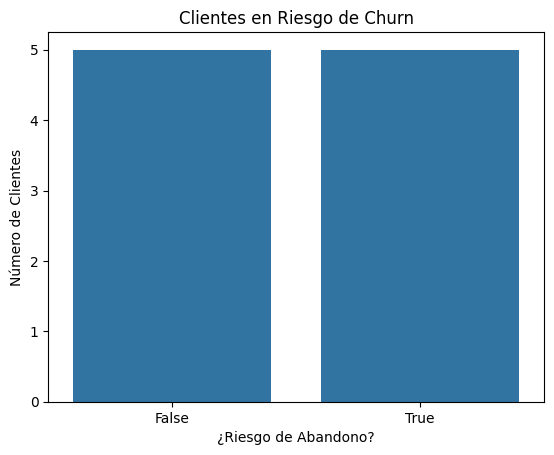

In [33]:
### 5. Análisis de Churn (heurístico) ###
df_rfm['Churn_riesgo'] = df_rfm['Recencia'] > df_rfm['Recencia'].median()
sns.countplot(x=df_rfm['Churn_riesgo'])
plt.title("Clientes en Riesgo de Churn")
plt.xlabel("¿Riesgo de Abandono?")
plt.ylabel("Número de Clientes")
plt.show()

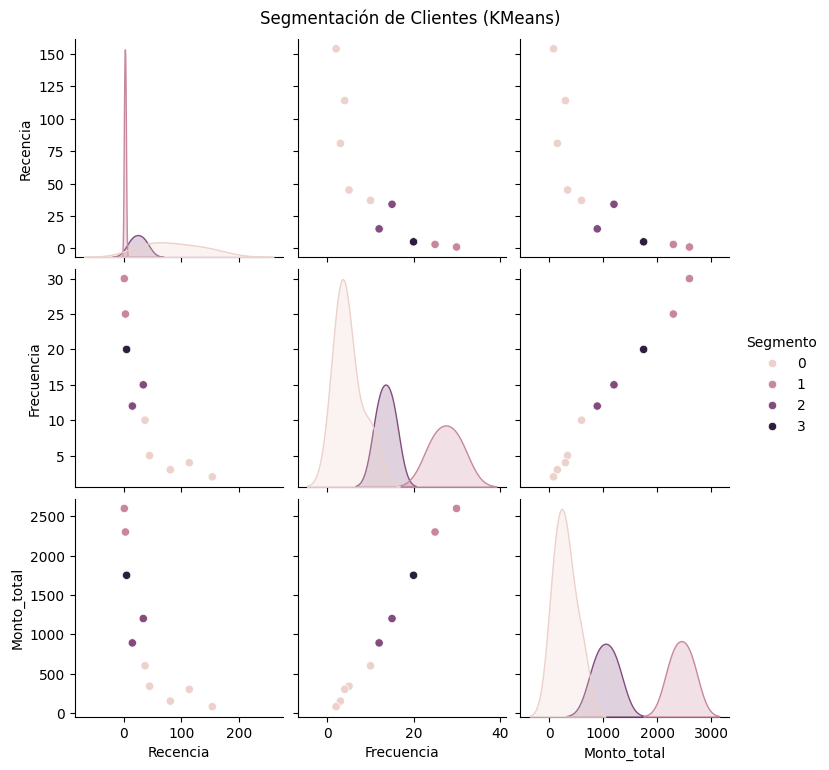

In [34]:
### 6. Segmentación por Comportamiento (KMeans simple) ###
X_cluster = df_rfm[['Recencia', 'Frecuencia', 'Monto_total']]
kmeans = KMeans(n_clusters=4, random_state=42)
df_rfm['Segmento'] = kmeans.fit_predict(X_cluster)
sns.pairplot(df_rfm, hue='Segmento', vars=['Recencia', 'Frecuencia', 'Monto_total'])
plt.suptitle("Segmentación de Clientes (KMeans)", y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                     antecedents                   consequents  \
42                (Moda, Libros)          (Electrónica, Hogar)   
45          (Electrónica, Hogar)                (Moda, Libros)   
21                (Moda, Libros)                 (Electrónica)   
24                 (Electrónica)                (Moda, Libros)   
13                      (Libros)          (Electrónica, Hogar)   
10          (Electrónica, Hogar)                      (Libros)   
38    (Moda, Electrónica, Hogar)                      (Libros)   
49                      (Libros)    (Moda, Electrónica, Hogar)   
48                 (Electrónica)         (Moda, Hogar, Libros)   
39         (Moda, Hogar, Libros)                 (Electrónica)   
20           (Moda, Electrónica)                      (Libros)   
25                      (Libros)           (Moda, Electrónica)   
0                  (Electrónica)                      (Libros)   
1                       (Libros)                 (Electrónica)   
55        

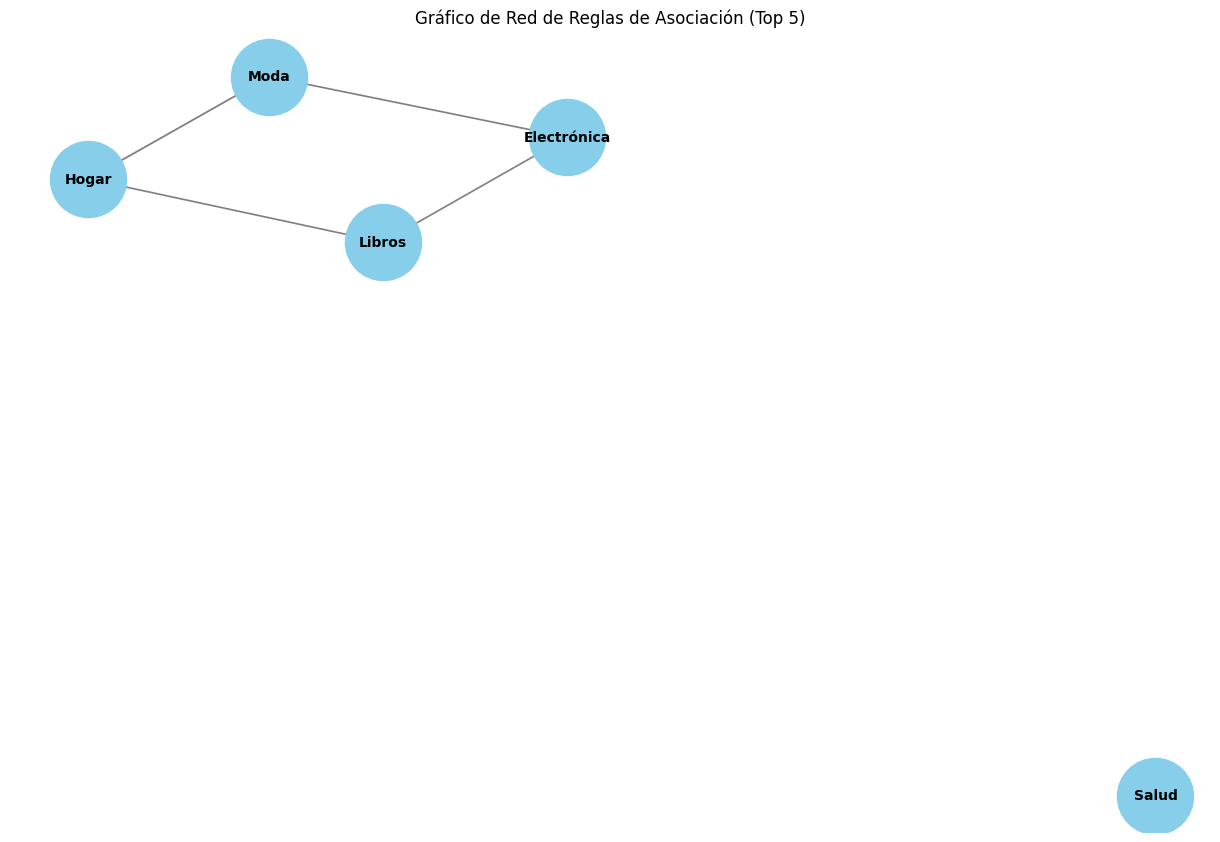

In [50]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

def analisis_afinidad(df):

    # 1. Preparación de los datos
    # Crear una tabla pivote donde las filas son CustomerID y las columnas son Categorias
    basket = df.groupby(['CustomerID', 'Categoria_favorita'])['Fecha_compra'].count().unstack().fillna(0)

    # Convertir los valores a booleanos (True/False) para el algoritmo Apriori
    basket = basket.applymap(lambda x: 1 if x > 0 else 0)

    # 2. Aplicar el algoritmo Apriori
    frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)  # Ajusta min_support según sea necesario

    # 3. Generar reglas de asociación
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)  # Ajusta min_threshold según sea necesario

    # 4. Filtrar y ordenar las reglas
    rules = rules.sort_values(by="lift", ascending=False)

    return rules

reglas_asociacion = analisis_afinidad(df)
print(reglas_asociacion)

# Crear un gráfico de red para las reglas de asociación más fuertes
plt.figure(figsize=(12, 8))
G = nx.Graph()

# Agregar nodos (categorías)
for item in df['Categoria_favorita'].unique():
    G.add_node(item)

# Agregar aristas (reglas de asociación)
top_n = 5  # Mostrar las 5 reglas más fuertes
for index, row in reglas_asociacion.head(top_n).iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    lift = row['lift']

    # Convertir conjuntos a listas para la visualización
    antecedents_list = list(antecedents)
    consequents_list = list(consequents)

    # Agregar aristas con el lift como peso
    for ant in antecedents_list:
        for cons in consequents_list:
            G.add_edge(ant, cons, weight=lift)

# Dibujar el gráfico
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Ajustar el diseño según sea necesario
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", width=edge_weights, edge_color="gray")
plt.title('Gráfico de Red de Reglas de Asociación (Top {})'.format(top_n))
plt.show()

#**Recomendaciones:**

Recomendaciones para Marketing Dirigido:  
Segmento de Clientes Recientes (Baja Recencia)
Características: Clientes que han comprado recientemente, lo que indica un alto nivel de engagement.  
Recomendaciones:  
Campañas de Upselling/Cross-selling: Promociona productos complementarios a sus compras recientes, especialmente en categorías como Electrónica o Moda, que podrían tener alta demanda según el dataset. Por ejemplo, si un cliente compró un dispositivo electrónico, ofrece accesorios o servicios relacionados.
Ofertas Personalizadas por Canal: Identifica si prefieren comprar por Web, App o Tienda (columna Canal) y adapta las promociones al canal preferido, como descuentos exclusivos en la App.  
Programas de Fidelización Inicial: Invita a estos clientes a un programa de lealtad para incentivar compras recurrentes, ofreciendo puntos o descuentos en su próxima transacción.  
Segmento de Clientes Leales (Alta Frecuencia)
Características: Clientes que compran con regularidad, mostrando lealtad a la marca.  
Recomendaciones:  
Programas de Recompensas Avanzados: Implementa un programa de fidelidad con niveles (e.g., oro, plata) que ofrezca beneficios exclusivos, como envíos gratuitos o acceso anticipado a nuevos productos.
Contenido Exclusivo: Envía newsletters personalizadas con información sobre tendencias en sus categorías favoritas (Salud, Hogar, etc.) o invitaciones a eventos exclusivos.  
Reconocimiento de Lealtad: Ofrece regalos o descuentos especiales en fechas clave (e.g., aniversarios de primera compra) para reforzar su conexión con la marca.  
Segmento de Clientes de Alto Valor (Alto Monto Total)
Características: Clientes que generan un alto gasto, siendo prioritarios por su contribución económica.  
Recomendaciones:  
Experiencias VIP: Diseña campañas exclusivas, como acceso a productos premium, servicios personalizados o invitaciones a eventos privados. Por ejemplo, si prefieren la categoría Electrónica, ofrece demostraciones exclusivas de nuevos dispositivos.  
Ofertas de Alto Valor: Promociona productos de mayor precio con incentivos como financiamiento sin intereses o paquetes combinados.  
Atención Personalizada: Asigna asesores dedicados o soporte prioritario para mejorar su experiencia de compra, especialmente en canales como Tienda o Web.
Segmento de Clientes Dormidos o Recuperables (Alta Recencia)
Características: Clientes que no han comprado recientemente, pero podrían reactivarse con el estímulo adecuado.  
Recomendaciones:  
Campañas de Reactivación: Envía correos electrónicos personalizados con descuentos limitados en el tiempo o promociones en sus categorías favoritas (Moda, Libros, etc.) para incentivar una nueva compra.  
Análisis de Abandono: Investiga si el canal de compra (App, Web, Tienda) influyó en su inactividad. Por ejemplo, si usaban la App pero dejaron de comprar, evalúa mejoras en la experiencia móvil.  
Encuestas de Retroalimentación: Ofrece un pequeño incentivo (e.g., cupón) a cambio de completar una encuesta para entender por qué dejaron de comprar y ajustar la estrategia.  
Optimización por Canal y Categoría Favorita  
Análisis Adicional: Aunque el clustering RFM no incorporó las columnas Canal y Categoria_favorita, estas son clave para personalizar campañas.
Canal: Identifica patrones de compra por canal (Tienda, Web, App). Por ejemplo, si un cluster prefiere Web, invierte en anuncios digitales o mejoras en el sitio web.  
Categoria_favorita: Adapta las promociones según las preferencias de categoría. Por ejemplo, los clientes que prefieren Salud podrían responder bien a campañas sobre productos de bienestar o suplementos.  
Recomendaciones:  
Crea campañas segmentadas por categoría, como descuentos en Hogar para clientes que compran frecuentemente en esa categoría.  
Optimiza la experiencia en el canal preferido de cada segmento, asegurando facilidad de uso y promociones específicas (e.g., descuentos exclusivos para compras en la App).  
Estrategias Generales para Todos los Segmentos
Automatización de Marketing: Implementa herramientas de automatización para enviar mensajes personalizados según el comportamiento RFM (e.g., correos automáticos tras un período de inactividad).  
Análisis Continuo: Monitorea regularmente las métricas RFM para detectar cambios en los segmentos y ajustar las campañas en tiempo real.
Pruebas A/B: Experimenta con diferentes mensajes y ofertas para cada cluster (e.g., descuentos vs. envíos gratis) para identificar qué estrategias generan mayor conversión.  